# Assignment 6
### Do Question 6, and three more questions of your choice.

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

1 — roll a single fair 3-sided die
Omega = {1, 2, 3}. The set of events is every subset of Omega (8 events total). Each outcome has probability 1/3. For any event E, P(E) = |E| / 3. P({1}) = 1/3, P({1,3}) = 2/3

2 — flip a fair coin twice
Omega = {HH, HT, TH, TT}. The set of events is every subset of Omega (16 events total). Each outcome has probability 1/4. For any event E, P(E) = |E| / 4. Exactly one head {HT,TH} has 1/2; at least one head {HH,HT,TH} has 3/4.

3 — roll the 3-sided die twice and add the results
The outcome is the sum, so Omega = {2, 3, 4, 5, 6}. Not all are equally likely. Probabilities of the sums are: P(2)=1/9, P(3)=2/9, P(4)=3/9, P(5)=2/9, P(6)=1/9.
The event set is every subset of {2,3,4,5,6} (32 events total). For any event F, P(F) is the sum of the above probabilities over the sums in F.


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

1 — One fair six-sided die. Omega = {1,2,3,4,5,6}. The event space is every subset of Omega (2^6 = 64 events). Each outcome has probability 1/6. For any event E, P(E) = |E| / 6.

2 — Random variable X = sqrt(pips) on one die The possible X values are {sqrt(1), sqrt(2), sqrt(3), sqrt(4), sqrt(5), sqrt(6)} = {1, √2, √3, 2, √5, √6}. Each has probability 1/6. The mass function puts 1/6 at each of those six points; the ECDF is a step function that jumps by 1/6 at each value in increasing order (1, √2, √3, 2, √5, √6).

3 — Two fair six-sided dice, random variable S = sum of pips. Omega (for S) = {2,3,4,5,6,7,8,9,10,11,12}. The event space is every subset of these 11 sums (2^11 = 2048 events). Probabilities of sums (out of 36 equally likely pairs) - P(S=2)=1/36, P(S=3)=2/36, P(S=4)=3/36, P(S=5)=4/36, P(S=6)=5/36, P(S=7)=6/36, P(S=8)=5/36, P(S=9)=4/36, P(S=10)=3/36, P(S=11)=2/36, P(S=12)=1/36.

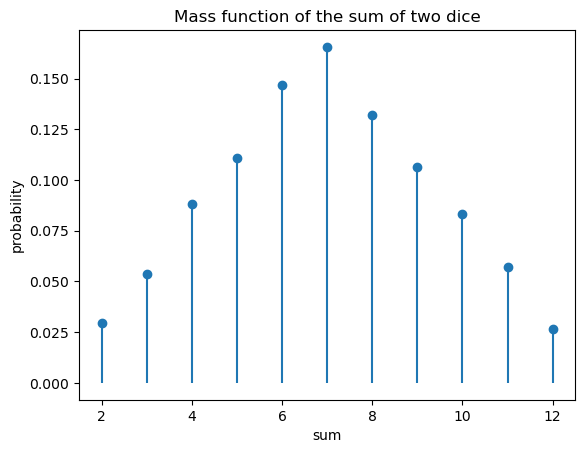

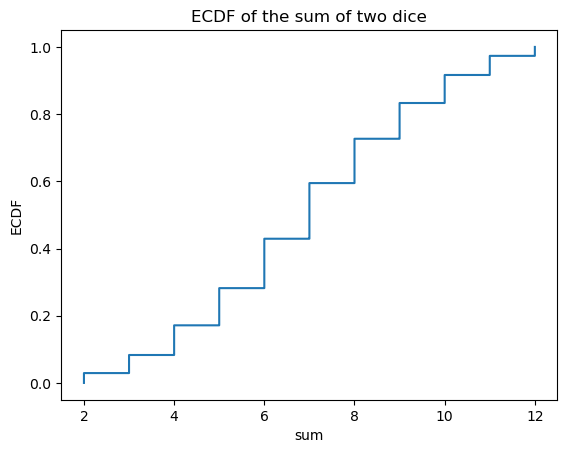

In [1]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng(42)
n = 10_000 # This code simulates 10,000 sums of two fair six-sided dice
d1 = rng.integers(1, 7, size=n)
d2 = rng.integers(1, 7, size=n)
sums_ = d1 + d2


all_sums = np.arange(2, 13)        
counts = np.zeros_like(all_sums, dtype=int)
vals, freqs = np.unique(sums_, return_counts=True)
counts[np.searchsorted(all_sums, vals)] = freqs # mass function (PMF)
pmf = counts / n

plt.figure()
plt.stem(all_sums, pmf, basefmt=" ")
plt.xlabel("sum")
plt.ylabel("probability")
plt.title("Mass function of the sum of two dice")

# ECDF 
x = np.sort(sums_)
y = np.arange(1, n + 1) / n

plt.figure()
plt.step(x, y, where="post")
plt.xlabel("sum")
plt.ylabel("ECDF")
plt.title("ECDF of the sum of two dice")
plt.show()

top chart (mass function): each dot is the chance of getting that sum when you roll two dice. the shape is highest in the middle and lowest at the ends. why? there are many ways to make 7 (6 ways), fewer ways to make 6 or 8 (5 ways), and only one way to make 2 or 12. so 7 shows the biggest dot (about 0.17), 6 and 8 are next (about 0.14), and 2 and 12 are tiny (about 0.03). it’s symmetric around 7.

bottom chart (ecdf): this adds up the chances as you move from left to right. at each sum, the line jumps up by the amount from the top chart. small jumps at the ends (rare sums), big jumps in the middle (common sums). by the time you hit 7, the curve is a little over 0.5 (about 0.58), which means more than half the time your sum is 7 or less. by 12 it reaches 1 because you’ve included all possible outcomes. any small wiggles from the exact numbers are just randomness from the 10,000 rolls.

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

My clear plan: Basically with my code, I need to define the wheel outcomes - European (37 outcomes: 0 plus 1–36). Represent bets by the set of covered slots; a bet on K slots wins with probability K/37. Payout rule they gave is if you win, gain 36/K − 1; if you lose, −1. this makes the expected value = 36/37 − 1 = −1/37 per dollar, no matter the K. Simulate sample outcomes uniformly from the 37 slots, check win/lose for each bet type (red, odd, “7”, a split, a 6-line), average the payoffs, and plot if needed.

In [2]:
WHEEL = np.array([0] + list(range(1, 37)))  # 0,1,2,...,36 (uniform)


REDS = {
    1,3,5,7,9,12,14,16,18,
    19,21,23,25,27,30,32,34,36
}
BLACKS = set(range(1, 37)) - REDS # standard red numbers on a European/American wheel

def payout(outcome: int, bet_slots: set[int]) -> float:
    """
    outcome: number spun (0..36)
    bet_slots: the set of slots you cover (size K)
    returns: + (36/K - 1) if win, else -1
    """
    K = len(bet_slots)
    return (36 / K - 1) if (outcome in bet_slots) else -1.0

def simulate_bet(bet_slots: set[int], n: int = 1000, seed: int = 42):
    """
    Simulate n spins for a fixed bet (set of covered slots).
    Returns the average payoff and the vector of payoffs.
    """
    rng = np.random.default_rng(seed)
    outcomes = rng.choice(WHEEL, size=n, replace=True)  # uniform over 37 slots
    pays = np.fromiter((payout(o, bet_slots) for o in outcomes), float, count=n)
    return pays.mean(), pays

#  define example bets
bet_red  = REDS# red (18 numbers)
bet_odd  = {x for x in range(1, 37) if x % 2 == 1}# odd (18 numbers; 0 not included)
bet_7    = {7}# single number
bet_split = {1, 2}# split (two adjacent numbers)
bet_line  = {1, 2, 3, 4, 5, 6}# a 6-line (six numbers)

# simulations 
for name, bet in [
    ("red", bet_red),
    ("odd", bet_odd),
    ("single 7", bet_7),
    ("split {1,2}", bet_split),
    ("line {1..6}", bet_line),
]:
    avg, pays = simulate_bet(bet, n=1000, seed=123)
    print(f"{name:10s} | K={len(bet):2d} | simulated average payoff ≈ {avg:.4f}")


red        | K=18 | simulated average payoff ≈ 0.0000
odd        | K=18 | simulated average payoff ≈ 0.0140
single 7   | K= 1 | simulated average payoff ≈ -0.0280
split {1,2} | K= 2 | simulated average payoff ≈ -0.0280
line {1..6} | K= 6 | simulated average payoff ≈ -0.0580


These simulated average payoffs bounce around small values because we only ran 1,000 spins. In theory, every fair European roulette bet has the same expected value, which is 36/37 − 1 = −1/37, which is about −0.027 per dollar. The samples are consistent with that, red = 0.0000 and odd = 0.0140 which are close to zero just by randomness, while single 7 and the split both = −0.028 and the line = −0.058 land near or a bit below −0.027. If you increase the number of spins, all of these averages will drift toward about −0.027. The number of covered slots K doesn’t change the expected value, only how swingy the results are.

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


In [3]:
from scipy import stats

Logistic distribution: support and density
Support is all real numbers (−infinity to infinity).
CDF: F(x; sigma) = 1 / (1 + exp(−x / sigma)), with sigma > 0.
Density (take derivative of F):
f(x; sigma) = (exp(−x / sigma) / sigma) / (1 + exp(−x / sigma))**2.
Used: scipy.stats.logistic — location/scale parameterization; here loc=0, sc

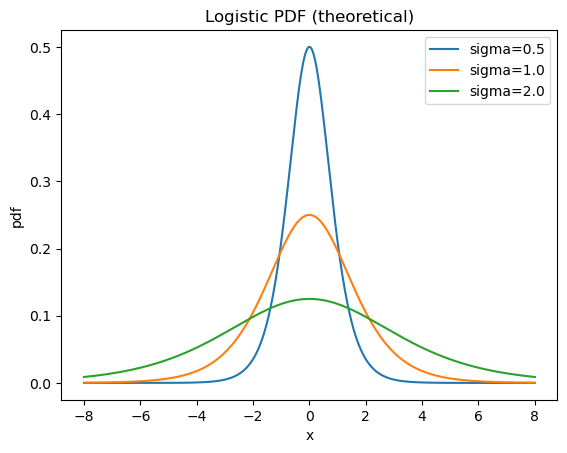

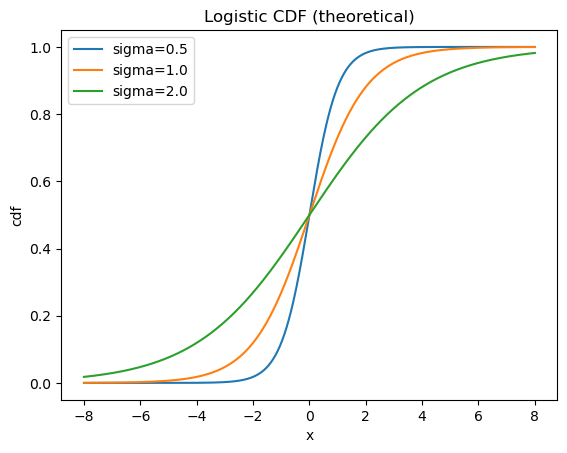

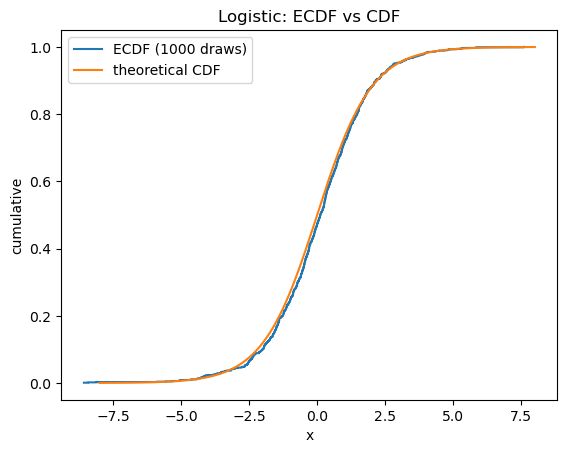

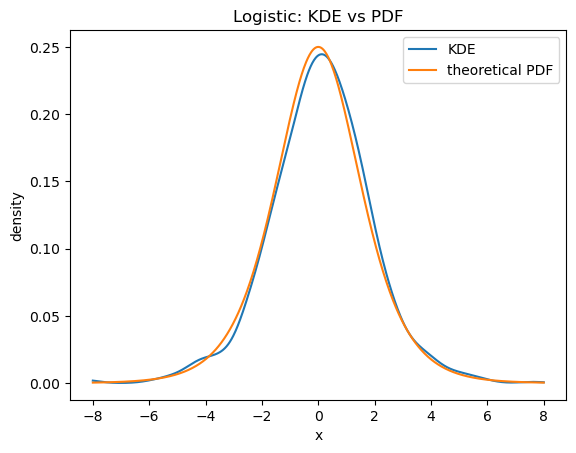

In [4]:
sigmas = [0.5, 1.0, 2.0]
x = np.linspace(-8, 8, 800)

plt.figure()
for s in sigmas:
    rv = stats.logistic(loc=0, scale=s)
    plt.plot(x, rv.pdf(x), label=f'sigma={s}')
plt.title('Logistic PDF (theoretical)')
plt.xlabel('x'); plt.ylabel('pdf'); plt.legend(); plt.show()

plt.figure()
for s in sigmas:
    rv = stats.logistic(loc=0, scale=s)
    plt.plot(x, rv.cdf(x), label=f'sigma={s}')
plt.title('Logistic CDF (theoretical)')
plt.xlabel('x'); plt.ylabel('cdf'); plt.legend(); plt.show()


rng = np.random.default_rng(0)
rv = stats.logistic(loc=0, scale=1.0) 
sample = rv.rvs(size=1000, random_state=rng)  # simulate 1000 draws for sigma=1 and compare ECDF/KDE with theory - from SciPy docs: rvs 


xs = np.sort(sample)# ECDF
ys = np.arange(1, len(xs)+1)/len(xs)

plt.figure()
plt.step(xs, ys, where='post', label='ECDF (1000 draws)')
plt.plot(x, rv.cdf(x), label='theoretical CDF')
plt.title('Logistic: ECDF vs CDF')
plt.xlabel('x'); plt.ylabel('cumulative'); plt.legend(); plt.show()

kde = stats.gaussian_kde(sample) 
# KDE vs PDF (simple Gaussian KDE from SciPy docs: stats.gaussian_kde)
plt.figure()
plt.plot(x, kde(x), label='KDE')
plt.plot(x, rv.pdf(x), label='theoretical PDF')
plt.title('Logistic: KDE vs PDF')
plt.xlabel('x'); plt.ylabel('density'); plt.legend(); plt.show()

As sigma gets bigger, the logistic curve spreads out: the pdf peak gets lower and wider, and the CDF transitions more slowly from 0 to 1. My 1000 draw ECDF basically sits on top of the theoretical CDF, and the KDE lines up with the theoretical pdf except for tiny wiggles at the tails—just sampling noise. Overall the sims match the theory well.

Exponential distribution: support and density
Support is x >= 0.
CDF: F(x; lambda) = 0 for x<0, and 1 − exp(−lambda x) for x>=0.
Density (derivative): f(x; lambda) = lambda * exp(−lambda x) for x>=0.
(Used: scipy.stats.expon has parameter scale = 1/lambda)

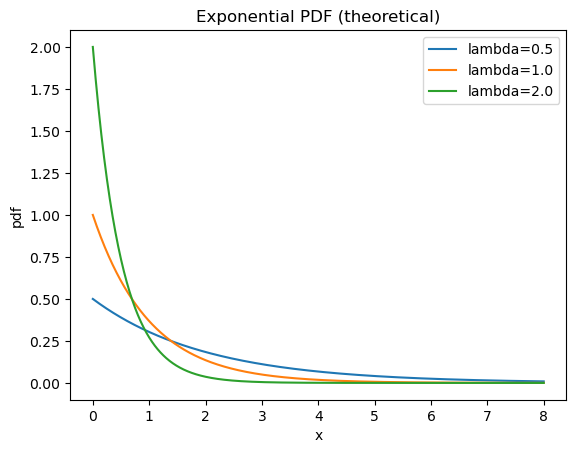

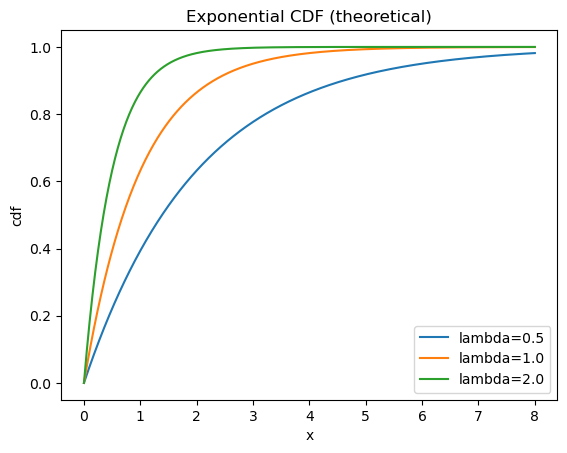

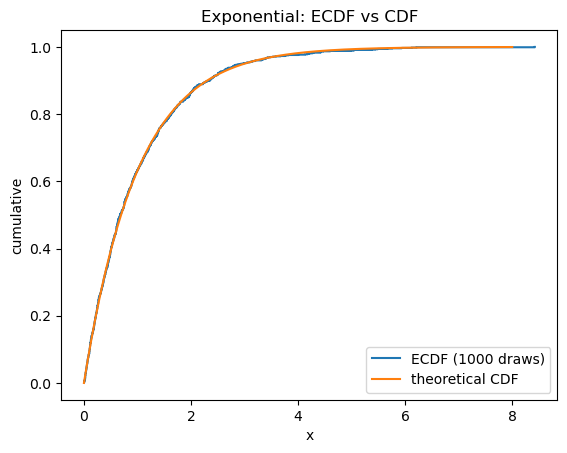

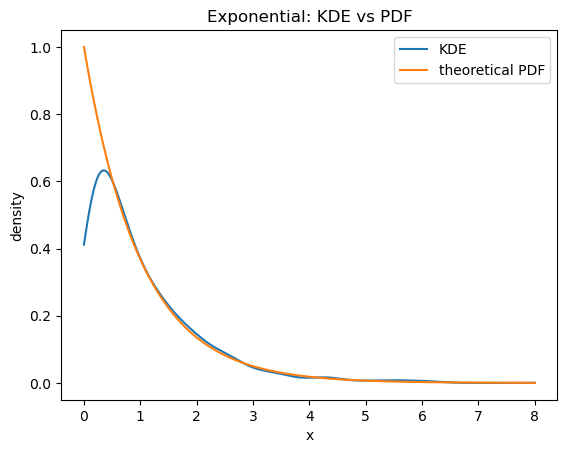

In [5]:
#Exponential: pdf/cdf for several lambdas from SciPy docs: stats.expon
lambdas = [0.5, 1.0, 2.0]
x = np.linspace(0, 8, 800)

plt.figure()
for lam in lambdas:
    rv = stats.expon(scale=1/lam)
    plt.plot(x, rv.pdf(x), label=f'lambda={lam}')
plt.title('Exponential PDF (theoretical)')
plt.xlabel('x'); plt.ylabel('pdf'); plt.legend(); plt.show()

plt.figure()
for lam in lambdas:
    rv = stats.expon(scale=1/lam)
    plt.plot(x, rv.cdf(x), label=f'lambda={lam}')
plt.title('Exponential CDF (theoretical)')
plt.xlabel('x'); plt.ylabel('cdf'); plt.legend(); plt.show()


rng = np.random.default_rng(1)
lam = 1.0
rv = stats.expon(scale=1/lam)
sample = rv.rvs(size=1000, random_state=rng)


xs = np.sort(sample) # ECDF
ys = np.arange(1, len(xs)+1)/len(xs)

plt.figure()
plt.step(xs, ys, where='post', label='ECDF (1000 draws)')
plt.plot(x, rv.cdf(x), label='theoretical CDF')
plt.title('Exponential: ECDF vs CDF')
plt.xlabel('x'); plt.ylabel('cumulative'); plt.legend(); plt.show()


kde = stats.gaussian_kde(sample)
plt.figure() # KDE vs PDF
plt.plot(x, kde(x), label='KDE')
plt.plot(x, rv.pdf(x), label='theoretical PDF')
plt.title('Exponential: KDE vs PDF')
plt.xlabel('x'); plt.ylabel('density'); plt.legend(); plt.show()

As lambda gets bigger, the exponential hugs the y-axis more: higher spike near 0 and a faster drop-off. Smaller lambda spreads the mass out with a longer tail. My ECDF from 1000 draws basically sits on the theoretical CDF, so the fit looks good. The KDE vs PDF also lines up well, the small bump near very small x is just smoothing + finite sample. Overall, bigger lambda means shorter average and quicker decay, which is exactly what the plots show.

Text — Negative Binomial: support and interpretation
Support: k = 0, 1, 2, … (number of failures before r successes).
PMF: f(k; r, p) = C(k + r − 1, k) * (1 − p)^k * p^r.
So just flip a coin with success prob p until r successes, k counts the failures that happened before the r-th success. I used scipy.stats.nbinom where n=r, p=p; from SciPy docs: stats.nbinom.pmf, cdf, rvs

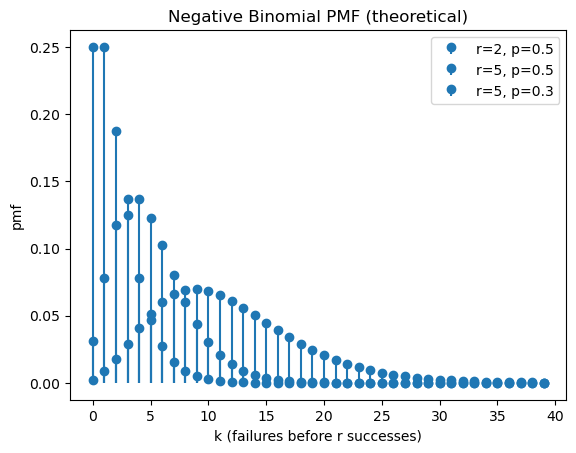

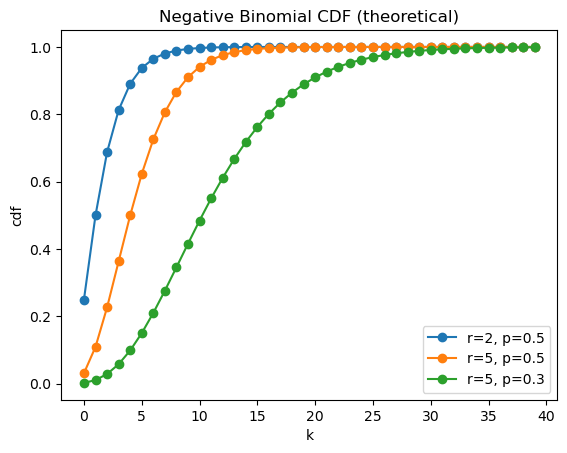

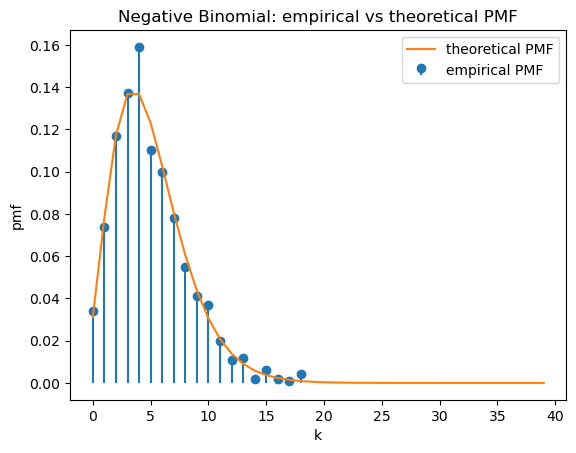

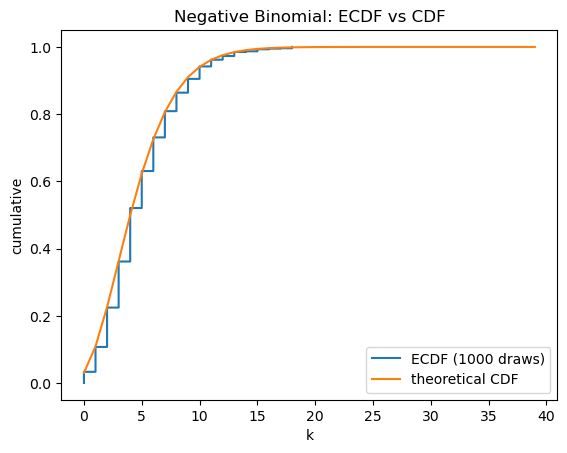

In [6]:
# Negative Binomial
params = [(2, 0.5), (5, 0.5), (5, 0.3)]
k = np.arange(0, 40)

plt.figure()
for r, p in params:
    rv = stats.nbinom(n=r, p=p)
    plt.stem(k, rv.pmf(k), basefmt=" ", label=f'r={r}, p={p}')
plt.title('Negative Binomial PMF (theoretical)')
plt.xlabel('k (failures before r successes)'); plt.ylabel('pmf'); plt.legend(); plt.show()

plt.figure()
for r, p in params:
    rv = stats.nbinom(n=r, p=p)
    plt.plot(k, rv.cdf(k), marker='o', linestyle='-', label=f'r={r}, p={p}')
plt.title('Negative Binomial CDF (theoretical)')
plt.xlabel('k'); plt.ylabel('cdf'); plt.legend(); plt.show()


rng = np.random.default_rng(2)
r, p = 5, 0.5
rv = stats.nbinom(n=r, p=p)
sample = rv.rvs(size=1000, random_state=rng)

vals, counts = np.unique(sample, return_counts=True)
emp_pmf = counts / counts.sum() # empirical pmf via counts

plt.figure()
plt.stem(vals, emp_pmf, basefmt=" ", label='empirical PMF')
plt.plot(k, rv.pmf(k), label='theoretical PMF')
plt.title('Negative Binomial: empirical vs theoretical PMF')
plt.xlabel('k'); plt.ylabel('pmf'); plt.legend(); plt.show()

xs = np.sort(sample)
ys = np.arange(1, len(xs)+1)/len(xs)
plt.figure()
plt.step(xs, ys, where='post', label='ECDF (1000 draws)')
plt.plot(k, rv.cdf(k), label='theoretical CDF')
plt.title('Negative Binomial: ECDF vs CDF')
plt.xlabel('k'); plt.ylabel('cumulative'); plt.legend(); plt.show()


With negative binomial, k counts failures before I get r successes. When I increase r from 2 to 5 the mass shifts to the right and spreads out a bit. When I lower p from 0.5 to 0.3 (keep r=5), it gets much more right-skewed with a longer tail—more failures before hitting r successes. My empirical PMF/ECDF from 1000 draws sit basically on the theoretical curves; tiny gaps at a few k values are just sampling noise.

Text, Categorical distribution: support and pmf
Support: the finite set {1, 2, …, K}.
PMF: P(X = k) = p_k with p_k >= 0 and sum p_k = 1.

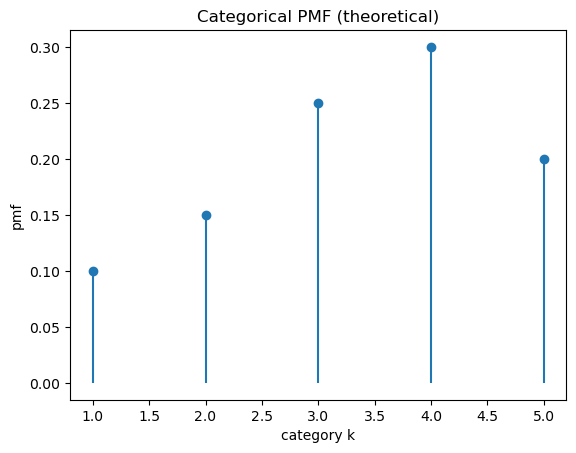

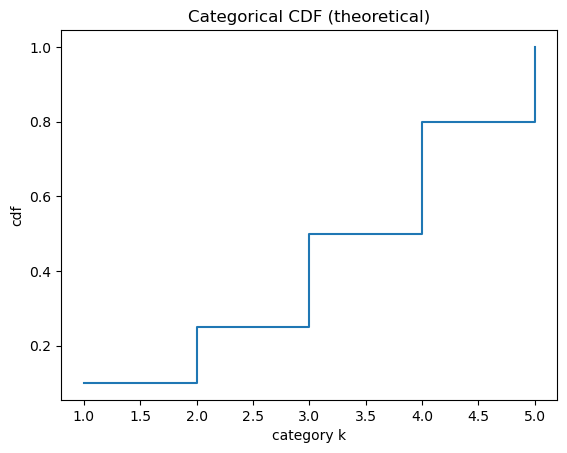

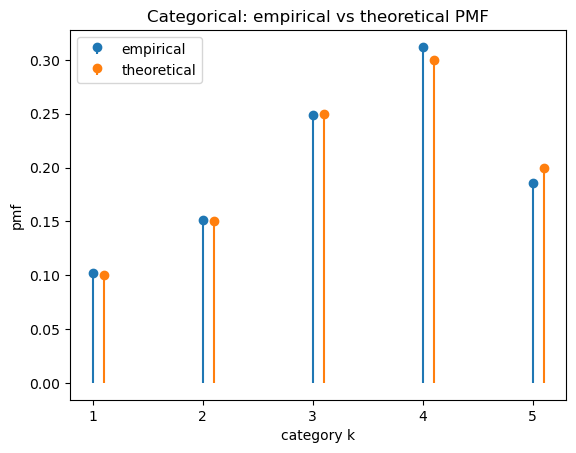

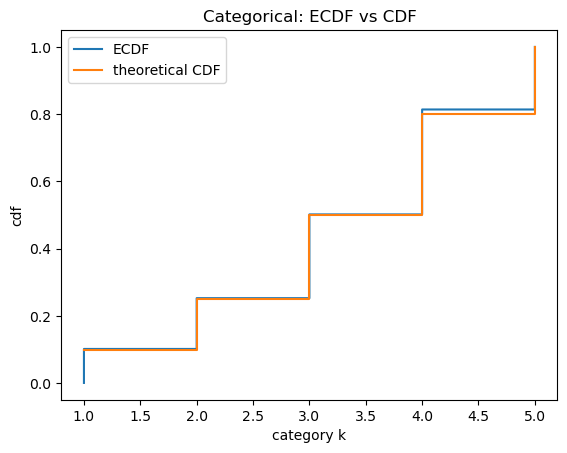

In [7]:
# Categorical via rv_discrete; pmf/cdf, simulate and compare - from SciPy docs: stats.rv_discrete
K = 5
p = np.array([0.10, 0.15, 0.25, 0.30, 0.20])  # sum to 1
support = np.arange(1, K+1)
rv = stats.rv_discrete(name='catK', values=(support, p))

# theoretical pmf/cdf
plt.figure()
plt.stem(support, rv.pmf(support), basefmt=" ")
plt.title('Categorical PMF (theoretical)')
plt.xlabel('category k'); plt.ylabel('pmf'); plt.show()

plt.figure()
plt.step(support, rv.cdf(support), where='post')
plt.title('Categorical CDF (theoretical)')
plt.xlabel('category k'); plt.ylabel('cdf'); plt.show()


rng = np.random.default_rng(3)
sample = rv.rvs(size=1000, random_state=rng)
vals, counts = np.unique(sample, return_counts=True)
emp = counts / counts.sum()

plt.figure()
plt.stem(vals, emp, basefmt=" ", label='empirical')
plt.stem(support+0.1, rv.pmf(support), basefmt=" ", linefmt='C1-', markerfmt='C1o', label='theoretical')  # offset for visibility
plt.title('Categorical: empirical vs theoretical PMF')
plt.xlabel('category k'); plt.ylabel('pmf'); plt.legend(); plt.show()


xs = np.sort(sample) #ECDF
ys = np.arange(1, len(xs)+1)/len(xs)
plt.figure()
plt.step(xs, ys, where='post', label='ECDF')
plt.step(support, rv.cdf(support), where='post', label='theoretical CDF')
plt.title('Categorical: ECDF vs CDF')
plt.xlabel('category k'); plt.ylabel('cdf'); plt.legend(); plt.show()


For the categorical distribution, each bar just shows the probability of picking each category. The PMF and CDF look exactly how they should stepwise since categories are discrete. My simulated frequencies from 1000 draws match the theoretical probabilities really closely. Any small difference between the blue and orange bars is just random variation from the sample size.